# Use Convolution Neural Network to classify 10 class cifar dataset using keras

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
#from torch.utils.data.sampler import SubsetRandomSampler
%matplotlib inline

In [5]:
# Setting parameters
# Sample Proccessed before model is updated
batch_size = 64
# Number of classes
number_classes = 10
# Cycle through the Training Data
epochs = 10

In [6]:
# Data sets cifers
cifar_labels=['airplane', 'automobile', 'bird',
   'cat', 'deer', 'dog', 'frog',
   'horse', 'ship', 'truck']

In [7]:
(x_train, y_train_vector), (x_test, y_test_vector) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [8]:
print(x_train.shape)
print(y_train_vector.shape)
print(x_test.shape)
print(y_test_vector.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [9]:
# Converting to matrix
y_train = keras.utils.to_categorical(y_train_vector, number_classes)
y_test = keras.utils.to_categorical(y_test_vector, number_classes)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [11]:
input_shape = x_train.shape[1:]
print(input_shape)

(32, 32, 3)


In [12]:
# Standardization and Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
print(x_train)
print(x_test)


[[[[ 59.  62.  63.]
   [ 43.  46.  45.]
   [ 50.  48.  43.]
   ...
   [158. 132. 108.]
   [152. 125. 102.]
   [148. 124. 103.]]

  [[ 16.  20.  20.]
   [  0.   0.   0.]
   [ 18.   8.   0.]
   ...
   [123.  88.  55.]
   [119.  83.  50.]
   [122.  87.  57.]]

  [[ 25.  24.  21.]
   [ 16.   7.   0.]
   [ 49.  27.   8.]
   ...
   [118.  84.  50.]
   [120.  84.  50.]
   [109.  73.  42.]]

  ...

  [[208. 170.  96.]
   [201. 153.  34.]
   [198. 161.  26.]
   ...
   [160. 133.  70.]
   [ 56.  31.   7.]
   [ 53.  34.  20.]]

  [[180. 139.  96.]
   [173. 123.  42.]
   [186. 144.  30.]
   ...
   [184. 148.  94.]
   [ 97.  62.  34.]
   [ 83.  53.  34.]]

  [[177. 144. 116.]
   [168. 129.  94.]
   [179. 142.  87.]
   ...
   [216. 184. 140.]
   [151. 118.  84.]
   [123.  92.  72.]]]


 [[[154. 177. 187.]
   [126. 137. 136.]
   [105. 104.  95.]
   ...
   [ 91.  95.  71.]
   [ 87.  90.  71.]
   [ 79.  81.  70.]]

  [[140. 160. 169.]
   [145. 153. 154.]
   [125. 125. 118.]
   ...
   [ 96.  99.  78.]
 

In [14]:
# Does the same thing divide each element by 255 and makes them a floating point, but it is
# to much for my computer to handle so we will just go with simple divide
# Max RGB pixel value makes sure that every input pixel is between 0 and 1
x_train = np.true_divide(x_train, 255)
x_test = np.true_divide(x_test, 255)


In [15]:
print(x_train)
print(y_test)
print(x_train.shape)
print(y_train.shape)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding= "same", input_shape = input_shape))

In [17]:
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size  = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [18]:
# RMS optimizer
optimizer = keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [19]:
# Training Model using RMS prop
model.compile(loss = "categorical_crossentropy", optimizer=optimizer, metrics = ["Accuracy"])

In [20]:
timed = keras.callbacks.EarlyStopping(monitor="val_acc", patience = 0, verbose=1)

In [21]:
#x_train = SubsetRandomSampler(x_train)
#y_train = SubsetRandomSampler(y_train)

callback_list = [timed]
x_train = np.array(x_train)

In [22]:
model_details = model.fit((x_train), (y_train), epochs=epochs, shuffle=True,
          batch_size=batch_size,
          validation_data=(x_train,y_train), 
          callbacks=callback_list)

Epoch 1/10
782/782 [==============================] - 237s 303ms/step - loss: 1.5755 - accuracy: 0.0000e+00 - val_loss: 1.1601 - val_accuracy: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 238s 304ms/step - loss: 1.1517 - accuracy: 0.0000e+00 - val_loss: 0.9198 - val_accuracy: 0.0000e+00
Epoch 3/10
782/782 [==============================] - 242s 309ms/step - loss: 0.9783 - accuracy: 0.0000e+00 - val_loss: 0.7863 - val_accuracy: 0.0000e+00
Epoch 4/10
782/782 [==============================] - 237s 304ms/step - loss: 0.8804 - accuracy: 2.0000e-06 - val_loss: 0.6868 - val_accuracy: 0.0000e+00
Epoch 5/10
782/782 [==============================] - 242s 310ms/step - loss: 0.8105 - accuracy: 1.8000e-05 - val_loss: 0.6009 - val_accuracy: 0.0000e+00
Epoch 6/10
782/782 [==============================] - 238s 305ms/step - loss: 0.7559 - accuracy: 4.6000e-05 - val_loss: 0.5910 - val_accuracy: 2.2000e-05
Epoch 7/10
782/782 [==============================] - 237s 303ms/step - loss

In [29]:
scores = model.evaluate(x_test,y_test)
print('Loss: %.2f' %scores[0])
print('Accuracy: %0.2f' %scores[1])

313/313 [==============================] - 10s 32ms/step - loss: 0.6456 - accuracy: 2.0000e-04
Test loss: 0.65
Test accuracy: 0.00


In [41]:
def plot_training_data(model_details):
  plt.plot(model_details.history['accuracy'])
  plt.plot(model_details.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(model_details.history['loss'])
  plt.plot(model_details.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

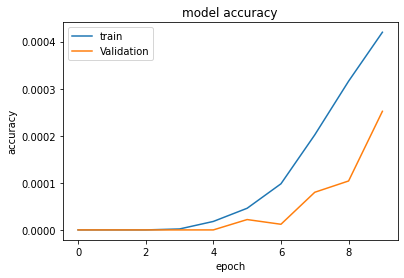

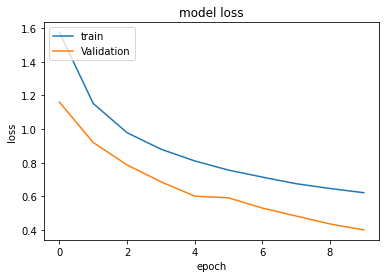

In [42]:
plot_training_data(model_details)

In [45]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [47]:
early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1 )

In [49]:
model_details = model.fit(x_train, y_train,
          batch_size=batch_size,
          validation_split=0.15,
          epochs=epochs,
          callbacks=[early],
          shuffle=True)

Epoch 1/10
665/665 [==============================] - 178s 267ms/step - loss: 0.5931 - accuracy: 0.7907 - val_loss: 0.4300 - val_accuracy: 0.8500
Epoch 2/10
665/665 [==============================] - 174s 262ms/step - loss: 0.5638 - accuracy: 0.8007 - val_loss: 0.4283 - val_accuracy: 0.8512
Epoch 3/10
665/665 [==============================] - 174s 262ms/step - loss: 0.5448 - accuracy: 0.8087 - val_loss: 0.5882 - val_accuracy: 0.8032
Epoch 4/10
665/665 [==============================] - 178s 268ms/step - loss: 0.5326 - accuracy: 0.8097 - val_loss: 0.4517 - val_accuracy: 0.8404
Epoch 5/10
665/665 [==============================] - 174s 262ms/step - loss: 0.5164 - accuracy: 0.8162 - val_loss: 0.4694 - val_accuracy: 0.8428
Epoch 6/10
665/665 [==============================] - 174s 262ms/step - loss: 0.4906 - accuracy: 0.8277 - val_loss: 0.4560 - val_accuracy: 0.8403
Epoch 7/10
665/665 [==============================] - 174s 262ms/step - loss: 0.4734 - accuracy: 0.8324 - val_loss: 0.4460 -

In [50]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: %.2f' %scores[0])
print('Accuracy: %.2f' %scores[1])

313/313 [==============================] - 10s 31ms/step - loss: 0.6287 - accuracy: 0.7954
Loss: 0.63
Accuracy: 0.80


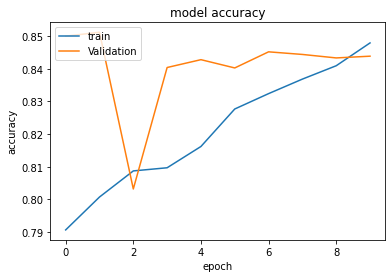

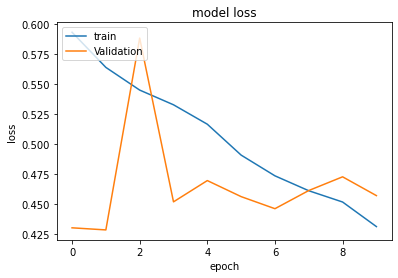

In [51]:
plot_training_data(model_details)

In [54]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [55]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1 )

In [56]:
model_details = model.fit(x_train, y_train,
          batch_size=batch_size,
          validation_split=0.15,
          epochs=epochs,
          callbacks=[early],
          shuffle=True)

Epoch 1/10
665/665 [==============================] - 69s 104ms/step - loss: 1.5883 - accuracy: 0.4212 - val_loss: 1.2865 - val_accuracy: 0.5437
Epoch 2/10
665/665 [==============================] - 69s 104ms/step - loss: 1.2399 - accuracy: 0.5578 - val_loss: 1.0638 - val_accuracy: 0.6275
Epoch 3/10
665/665 [==============================] - 69s 104ms/step - loss: 1.1044 - accuracy: 0.6082 - val_loss: 0.9855 - val_accuracy: 0.6619
Epoch 4/10
665/665 [==============================] - 73s 110ms/step - loss: 1.0225 - accuracy: 0.6406 - val_loss: 0.9610 - val_accuracy: 0.6623
Epoch 5/10
665/665 [==============================] - 69s 104ms/step - loss: 0.9547 - accuracy: 0.6639 - val_loss: 0.9317 - val_accuracy: 0.6771
Epoch 6/10
665/665 [==============================] - 69s 104ms/step - loss: 0.9105 - accuracy: 0.6790 - val_loss: 0.8675 - val_accuracy: 0.6979
Epoch 7/10
665/665 [==============================] - 69s 104ms/step - loss: 0.8585 - accuracy: 0.6983 - val_loss: 0.8362 - val_ac

In [57]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: %0.2f' %scores[0])
print('Accuracy: %0.2f' %scores[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.7962 - accuracy: 0.7269
Loss: 0.80
Accuracy: 0.73


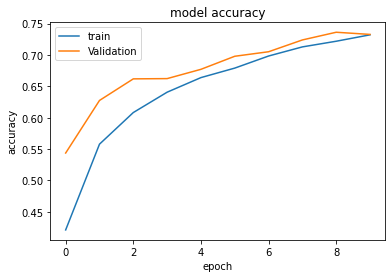

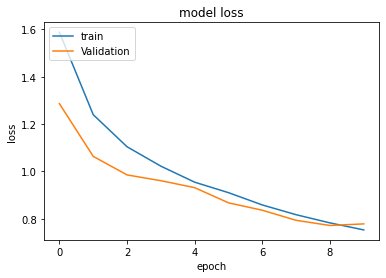

In [58]:
plot_training_data(model_details)

In [60]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)       

In [62]:
optimizer = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1 )

model_details = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.15,
          callbacks=[early],
          shuffle=True)

Epoch 1/10
665/665 [==============================] - 170s 256ms/step - loss: 2.3041 - accuracy: 0.1004 - val_loss: 2.3035 - val_accuracy: 0.0953
Epoch 2/10
665/665 [==============================] - 174s 262ms/step - loss: 2.3030 - accuracy: 0.0994 - val_loss: 2.3037 - val_accuracy: 0.0984
Epoch 3/10
665/665 [==============================] - 170s 256ms/step - loss: 2.3031 - accuracy: 0.0975 - val_loss: 2.3033 - val_accuracy: 0.0972
Epoch 4/10
665/665 [==============================] - 171s 257ms/step - loss: 2.3031 - accuracy: 0.1010 - val_loss: 2.3032 - val_accuracy: 0.0953
Epoch 5/10
665/665 [==============================] - 171s 257ms/step - loss: 2.3032 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.0953
Epoch 6/10
665/665 [==============================] - 175s 263ms/step - loss: 2.3032 - accuracy: 0.0981 - val_loss: 2.3035 - val_accuracy: 0.0984
Epoch 7/10
665/665 [==============================] - 172s 258ms/step - loss: 2.3031 - accuracy: 0.1006 - val_loss: 2.3029 -

In [64]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: %0.2f' %scores[0])
print('Accuracy: %0.2f' %scores[1])

313/313 [==============================] - 10s 32ms/step - loss: 2.3030 - accuracy: 0.1000
Loss: 2.30
Accuracy: 0.10


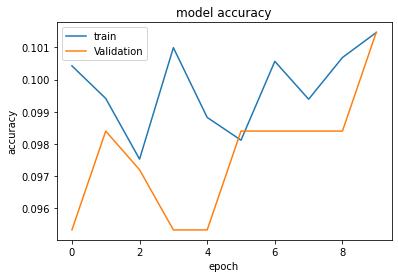

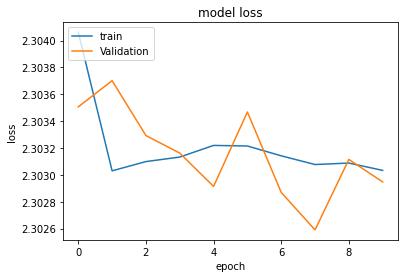

In [65]:
plot_training_data(model_details)

In [67]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))

In [68]:
optimizer = keras.optimizers.Adam(lr=0.00001, beta_1=0.8, beta_2=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

stop_early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1 )

model_details = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.15,
          callbacks=[stop_early],
          shuffle=True)

Epoch 1/10
665/665 [==============================] - 176s 265ms/step - loss: 2.2871 - accuracy: 0.1255 - val_loss: 2.2622 - val_accuracy: 0.2063
Epoch 2/10
665/665 [==============================] - 176s 265ms/step - loss: 2.1772 - accuracy: 0.2035 - val_loss: 2.0725 - val_accuracy: 0.2667
Epoch 3/10
665/665 [==============================] - 180s 271ms/step - loss: 2.0303 - accuracy: 0.2541 - val_loss: 1.9623 - val_accuracy: 0.2973
Epoch 4/10
665/665 [==============================] - 180s 270ms/step - loss: 1.9505 - accuracy: 0.2887 - val_loss: 1.8886 - val_accuracy: 0.3267
Epoch 5/10
665/665 [==============================] - 178s 268ms/step - loss: 1.8854 - accuracy: 0.3151 - val_loss: 1.8273 - val_accuracy: 0.3488
Epoch 6/10
665/665 [==============================] - 181s 273ms/step - loss: 1.8319 - accuracy: 0.3361 - val_loss: 1.7827 - val_accuracy: 0.3645
Epoch 7/10
665/665 [==============================] - 176s 265ms/step - loss: 1.7941 - accuracy: 0.3506 - val_loss: 1.7450 -

In [69]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: %0.2f' %scores[0])
print('Accuracy: %0.2f' %scores[1])

313/313 [==============================] - 10s 32ms/step - loss: 1.6394 - accuracy: 0.4129
Loss: 1.64
Accuracy: 0.41


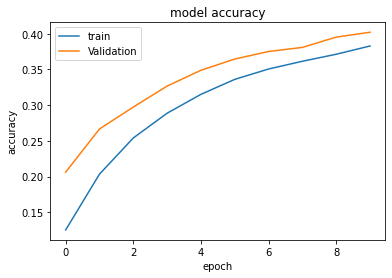

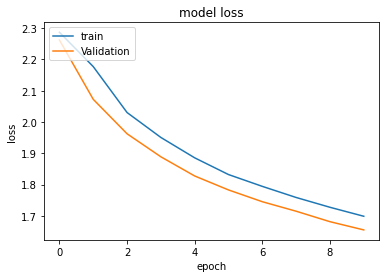

In [70]:
plot_training_data(model_details)